In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

df.columns = df.columns.str.strip()
df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
df_X=df.drop(columns=['Bankrupt?'],axis=1)
df_Y=df['Bankrupt?']

# normalize the data_X
scaler = StandardScaler()
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

iqr_threshold=0.07
iqr = df_X.quantile(0.75) - df_X.quantile(0.25)
iqr = iqr[iqr < iqr_threshold]
#print("number of columns to drop with 0.07 iqr threshhold",len(iqr))
#print(iqr.index.values.tolist())
list_of_columns_to_drop = iqr.index.values.tolist()
df_X = df_X.drop(columns=list_of_columns_to_drop)

col_drop_0_9_correlation=["ROA(A) before interest and % after tax",
'ROA(B) before interest and depreciation after tax',
'ROA(C) before interest and depreciation before interest',
'Realized Sales Gross Margin',
'Operating Gross Margin',
'Net Value Per Share (C)',
'Net Value Per Share (B)',
'Per Share Net profit before tax (Yuan ¥)',
'Persistent EPS in the Last Four Seasons',
'Operating Profit Per Share (Yuan ¥)',
'Debt ratio %',
'Borrowing dependency',
'Liability to Equity',
'Current Liability to Equity']
df_X = df_X.drop(columns=col_drop_0_9_correlation)

print(df_X.shape)
df_Y.value_counts()

(6819, 40)


Bankrupt?
0    6599
1     220
Name: count, dtype: int64

### Avec pondération

C:\Users\Ad\AppData\Local\Temp\ipykernel_7936\1301857005.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")


[0.43309544 0.55739147 0.62744697 0.67751089 0.72328813 0.76168319
 0.7916909  0.81624099 0.83415088 0.85121089 0.86566755 0.87846299
 0.88920753 0.8992068  0.90847457 0.91746348 0.92602555 0.93449
 0.94185057 0.94865254 0.95530387 0.9618496  0.96759891 0.97305139
 0.97731462 0.98120575 0.98452306 0.98770007 0.99000256 0.99216773
 0.99424389 0.99576378 0.9969879  0.9980654  0.99891048 0.99943126
 0.9998262  1.         1.         1.        ]


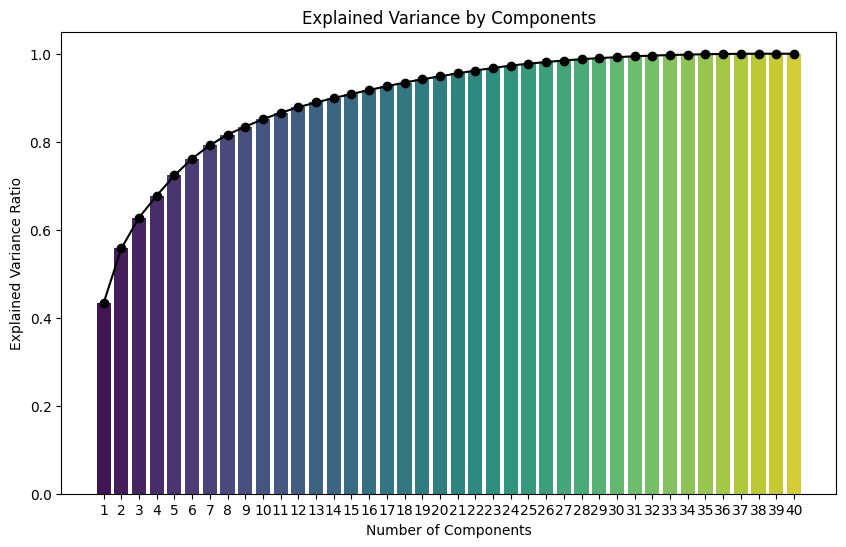

In [2]:
########## PONDERATION DES DONNEES #########

# on pourrait utiliser des techniques de pondération
n=len(df_Y)

weight_bankrupt=0.5/220
weight_Non_bankrupt=0.5/6599
weights=np.where(df_Y==1,weight_bankrupt,weight_Non_bankrupt)
scaled_X = df_X.multiply(np.sqrt(weights), axis=0)
n_comp=40
pca = PCA(n_components=n_comp)
pca.fit(scaled_X)
cumulative_variance_scaled = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance_scaled, marker='o', linestyle='-', color='black')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()
print(cumulative_variance_scaled)

### Sans pondération

C:\Users\Ad\AppData\Local\Temp\ipykernel_7936\2910517762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")


[0.17165648 0.28819558 0.37372708 0.44596042 0.50312761 0.5490828
 0.5876607  0.62396789 0.65662304 0.68669612 0.71310629 0.73854643
 0.76343347 0.78678955 0.80786657 0.82814422 0.84804044 0.86615063
 0.88212126 0.8976455  0.9120039  0.92468596 0.93534381 0.94486455
 0.95341475 0.96078073 0.96734798 0.97316009 0.97816224 0.98258592
 0.986692   0.99044165 0.99342474 0.99583313 0.99773907 0.99929014
 0.99981163 1.         1.         1.        ]


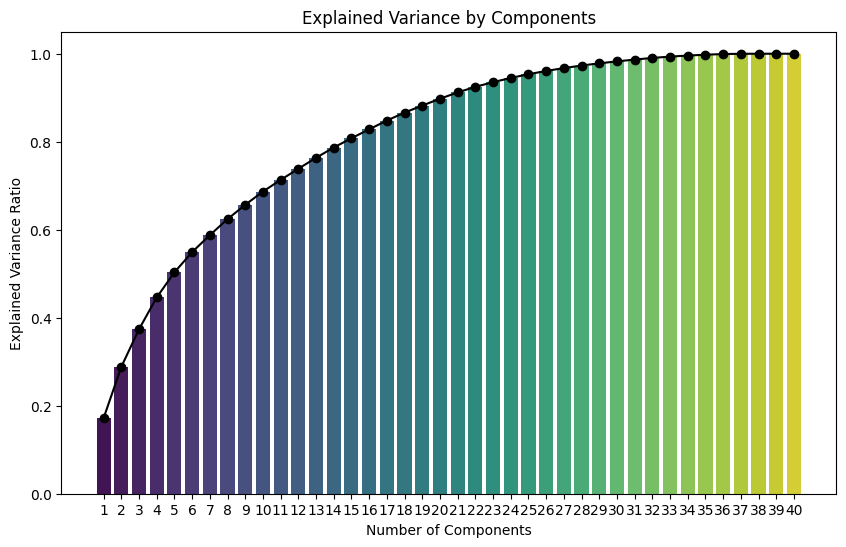

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# on pourrait utiliser des techniques de pondération
n_comp=40
pca = PCA(n_components=n_comp)
pca.fit(df_X)
cumulative_variance_scaled = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance_scaled, marker='o', linestyle='-', color='black')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()
print(cumulative_variance_scaled)

#